# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
#     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
       

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City '" + city.title() +" 'not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | scituate
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | aklavik
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | carahue
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | tadine
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | the valley
Processing Record 12 of Set 1 | broome
Processing Record 13 of Set 1 | turukhansk
Processing Record 14 of Set 1 | ostrovnoy
Processing Record 15 of Set 1 | villa union
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | herat
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | leningradskiy
Processing Record 22 of Set 1 | taolanaro
City 'Taolanaro 'not found. Skipping...
P

Processing Record 35 of Set 4 | westpunt
City 'Westpunt 'not found. Skipping...
Processing Record 36 of Set 4 | arraial do cabo
Processing Record 37 of Set 4 | shihezi
Processing Record 38 of Set 4 | panzhihua
Processing Record 39 of Set 4 | sao joao da barra
Processing Record 40 of Set 4 | asfi
Processing Record 41 of Set 4 | hithadhoo
Processing Record 42 of Set 4 | mattawa
Processing Record 43 of Set 4 | bitung
Processing Record 44 of Set 4 | springfield
Processing Record 45 of Set 4 | shelburne
Processing Record 46 of Set 4 | rosarito
Processing Record 47 of Set 4 | fortuna
Processing Record 48 of Set 4 | gizo
Processing Record 49 of Set 4 | harindanga
Processing Record 0 of Set 5 | bogorodskoye
Processing Record 1 of Set 5 | huanan
Processing Record 2 of Set 5 | khani
Processing Record 3 of Set 5 | luganville
Processing Record 4 of Set 5 | gorontalo
Processing Record 5 of Set 5 | san jose
Processing Record 6 of Set 5 | iqaluit
Processing Record 7 of Set 5 | swan hill
Processing Re

Processing Record 23 of Set 8 | abhar
Processing Record 24 of Set 8 | broken hill
Processing Record 25 of Set 8 | tingi
Processing Record 26 of Set 8 | aflu
City 'Aflu 'not found. Skipping...
Processing Record 27 of Set 8 | meyungs
City 'Meyungs 'not found. Skipping...
Processing Record 28 of Set 8 | kahului
Processing Record 29 of Set 8 | flinders
Processing Record 30 of Set 8 | mkushi
Processing Record 31 of Set 8 | sol-iletsk
Processing Record 32 of Set 8 | pacific grove
Processing Record 33 of Set 8 | malanville
Processing Record 34 of Set 8 | saint george
Processing Record 35 of Set 8 | yangjiang
Processing Record 36 of Set 8 | amderma
City 'Amderma 'not found. Skipping...
Processing Record 37 of Set 8 | qui nhon
Processing Record 38 of Set 8 | biak
Processing Record 39 of Set 8 | lima duarte
Processing Record 40 of Set 8 | ponta delgada
Processing Record 41 of Set 8 | guaruja
Processing Record 42 of Set 8 | dibaya
City 'Dibaya 'not found. Skipping...
Processing Record 43 of Set 8

Processing Record 5 of Set 12 | dickson
Processing Record 6 of Set 12 | khandyga
Processing Record 7 of Set 12 | opuwo
Processing Record 8 of Set 12 | alcantarilla
Processing Record 9 of Set 12 | atambua
Processing Record 10 of Set 12 | montmagny
Processing Record 11 of Set 12 | hare bay
Processing Record 12 of Set 12 | amuntai
Processing Record 13 of Set 12 | mulchen
Processing Record 14 of Set 12 | barentu
Processing Record 15 of Set 12 | auki
Processing Record 16 of Set 12 | groa
Processing Record 17 of Set 12 | mount pleasant
Processing Record 18 of Set 12 | taoudenni
Processing Record 19 of Set 12 | kudahuvadhoo
Processing Record 20 of Set 12 | lodwar
Processing Record 21 of Set 12 | itapema
Processing Record 22 of Set 12 | korla
Processing Record 23 of Set 12 | ligayan
Processing Record 24 of Set 12 | viedma
Processing Record 25 of Set 12 | channel-port aux basques
Processing Record 26 of Set 12 | kutum
Processing Record 27 of Set 12 | moses lake
Processing Record 28 of Set 12 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
489,Techiman,7.5862,-1.9414,33.61,42,77,1.62,GH,1680958466
351,Sol-Iletsk,51.1631,54.9918,9.11,36,6,6.90,RU,1680958394
379,Salisbury,51.0693,-1.7957,15.38,56,40,3.09,GB,1680958403
394,Flin Flon,54.7682,-101.8650,-8.09,79,0,2.06,CA,1680958412
151,Bandarbeyla,9.4942,50.8122,29.09,61,8,4.81,SO,1680958338
168,Severo-Kurilsk,50.6789,156.1250,2.27,99,100,4.13,RU,1680958344
536,Mahajanga,-15.7167,46.3167,34.01,49,20,3.09,MG,1680958478
465,Cidreira,-30.1811,-50.2056,21.88,73,86,5.60,BR,1680958452
387,Baikunthpur,23.2500,82.5500,27.69,26,100,2.13,IN,1680958408
439,Beeville,28.4008,-97.7483,13.12,94,100,2.06,US,1680958438


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
372,Takoradi,4.8845,-1.7554,31.36,62,99,4.75,GH,1680958399
548,Grand-Lahou,5.1367,-5.0242,31.28,60,52,4.06,CI,1680958481
227,Tasiilaq,65.6145,-37.6368,3.09,94,100,15.41,GL,1680958359
385,Zlobin,45.2924,14.6541,11.61,42,20,2.57,HR,1680958407
563,Erzin,36.9559,36.2000,19.07,42,100,1.68,TR,1680958485
255,Kaa-Khem,51.6833,94.7333,5.18,74,100,1.49,RU,1680958367
327,Miastko,54.0028,16.9826,12.73,49,100,1.79,PL,1680958387
409,Ambanja,-13.6833,48.4500,31.96,81,11,2.00,MG,1680958422
17,Port Elizabeth,-33.9180,25.5701,21.29,77,75,7.20,ZA,1680958300


In [8]:
# Set Time to inlcuded on Graphs
today = time.time()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

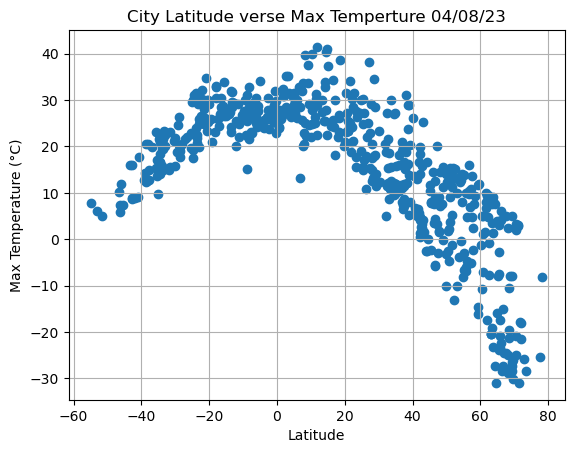

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude verse Max Temperture " + time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

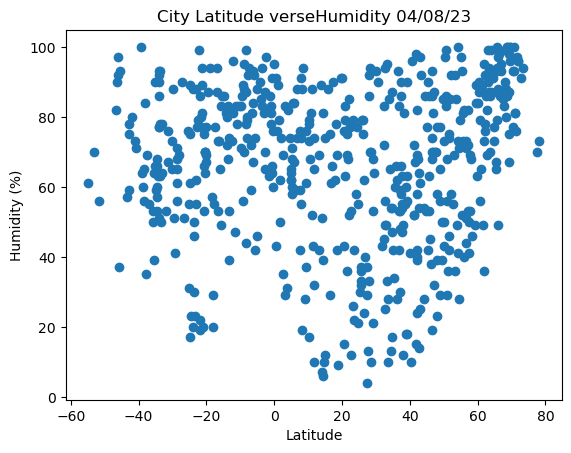

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude verseHumidity " + time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

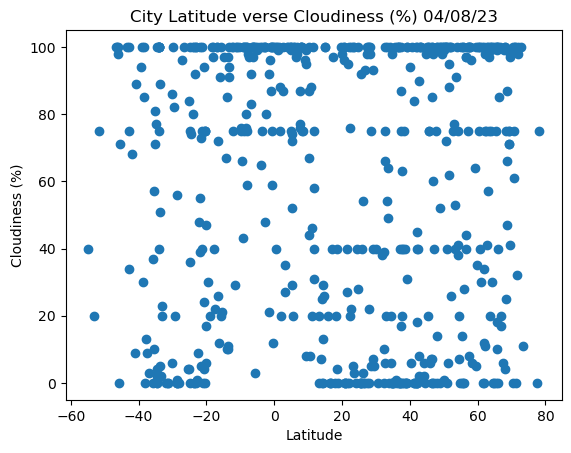

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude verse Cloudiness (%) "  + time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

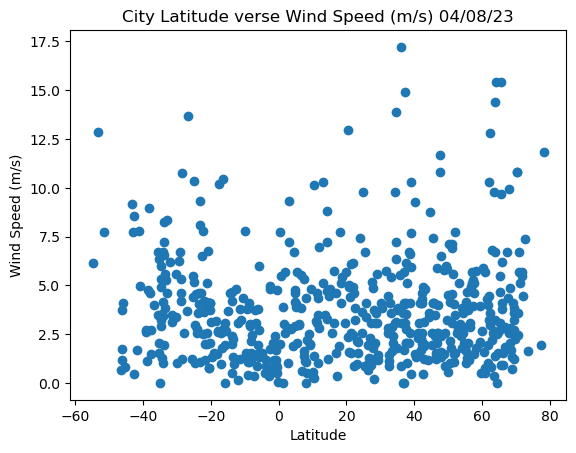

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude verse Wind Speed (m/s) "  + time.strftime("%x"))
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, location):
    # Regression caluculation
    (slope, intercept, rvalue, pvalue, srderr) = linregress(x_values, y_values)
    
    # Linean Regression line calucation
    regress_values = (slope * x_values) + intercept
    line_eq = f"y = {round(slope ,2)}x +{round(intercept ,2)}"
    print(f" The rvalue is: {round((rvalue **2),5)}")
    
    
    # create plots

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="red")
   
    # Show equation on scatter plot
  
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} Hemisphere - Linear Regression of {y_label} verse {x_label} "  + time.strftime("%x"))
    plt.annotate(line_eq, location, color="red")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.sample(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
527,Korla,41.7597,86.1469,16.61,15,0,4.11,CN,1680958475
24,Iisalmi,63.5592,27.1907,3.52,86,100,0.36,FI,1680958303
470,Inuvik,68.3499,-133.7218,-19.52,80,75,2.06,CA,1680958456
337,Hounde,11.5000,-3.5167,30.18,43,100,3.48,BF,1680958390
0,Chokurdakh,70.6333,147.9167,-25.01,100,61,2.44,RU,1680958293
101,Okhotsk,59.3833,143.3000,-16.03,89,5,2.11,RU,1680958324
29,Vardo,70.3705,31.1107,1.99,93,100,10.80,NO,1680958304
117,Nyurba,63.2842,118.3319,-20.43,94,99,2.55,RU,1680958204
45,Jamestown,42.0970,-79.2353,0.57,82,0,2.24,US,1680958012


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
68,Bambous Virieux,-20.3428,57.7575,29.14,70,75,4.12,MU,1680958314
335,Angoram,-4.0625,144.0661,24.11,90,100,0.50,PG,1680958389
69,Cape Town,-33.9258,18.4232,20.06,51,40,8.23,ZA,1680958082
38,Quatre Cocos,-20.2078,57.7625,29.06,77,47,3.72,MU,1680958306
549,Alice Springs,-23.7000,133.8833,21.79,46,100,3.60,AU,1680958299
499,San Rafael,-34.6177,-68.3301,21.78,53,1,3.20,AR,1680958350
245,Olinda,-8.0089,-34.8553,28.85,79,75,1.54,BR,1680957984
341,Quelimane,-17.8786,36.8883,32.97,55,40,2.68,MZ,1680958391
43,Rundu,-17.9333,19.7667,32.93,20,97,2.62,NaN,1680958307


###  Temperature vs. Latitude Linear Regression Plot

 The rvalue is: 0.69398


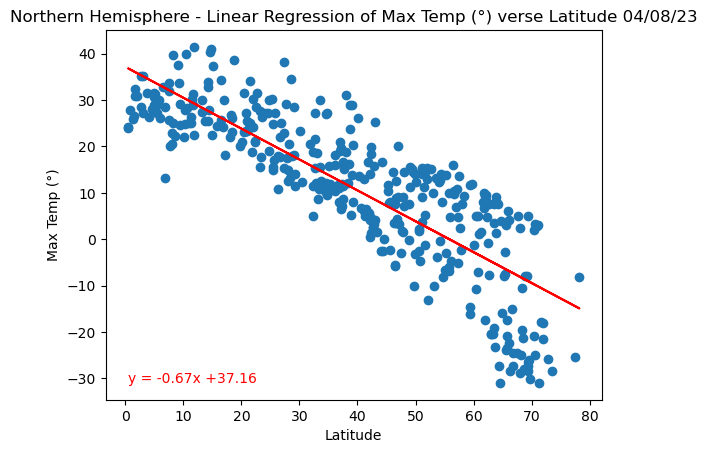

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (°)", "Northern", (x_values.min(), y_values.min()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig1.png")

plt.show()



 The rvalue is: 0.57388


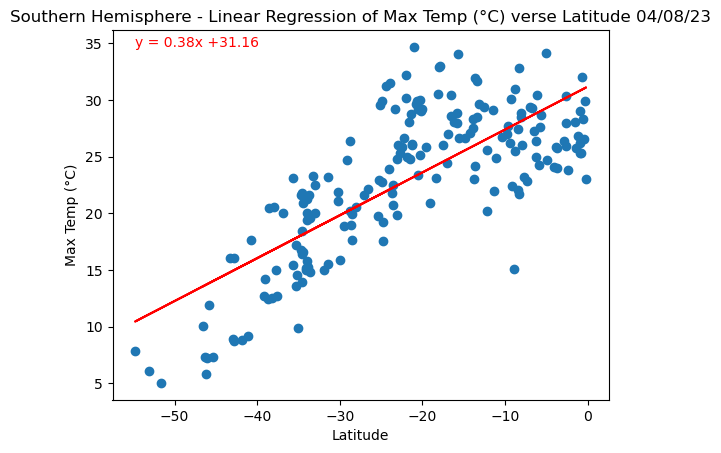

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (°C)", "Southern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig2.png")

plt.show()

Discussion about the linear relationship (04/08/2023): For the northern hemisphere with is a good corralation as the r-values is 0.71 with southern hemisphere has an r-value of 0.55 doesn't show as much of corralation.  With the northern hemisphere plot the data points are much closer to the linear regression line.

### Humidity vs. Latitude Linear Regression Plot

 The rvalue is: 0.10467


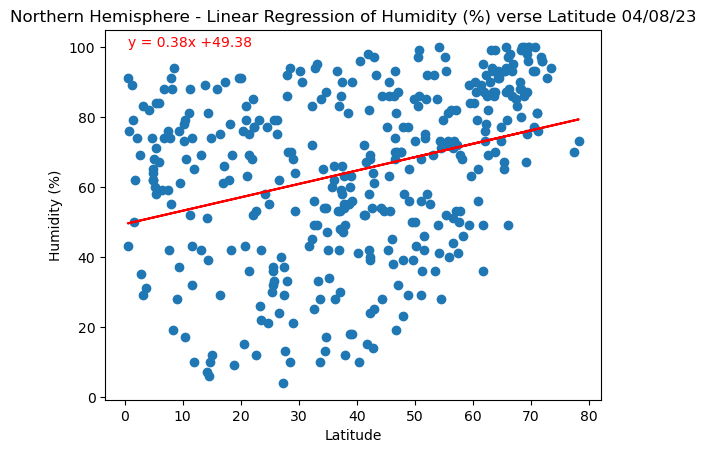

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig3.png")

plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 378 and the array at index 1 has size 189

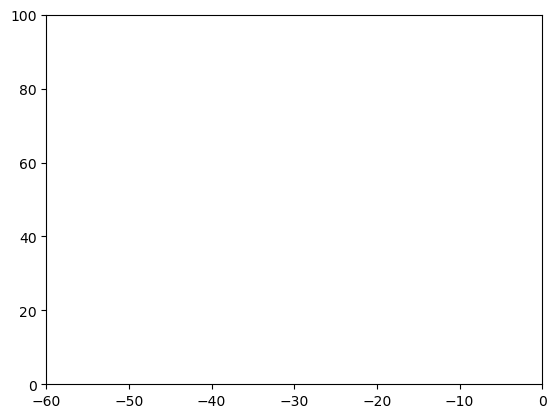

In [19]:
# Southern Hemisphere
x_vaules = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig4.png")

plt.show()

Discussion about the linear relationship: For the northern and southern Humidity there is not a good corration with the data both r-values are 0.11 and 0.13 respectively.  When viewing the plots you can see a wide spread of data points compared to the linear regression line.

### Cloudiness vs. Latitude Linear Regression Plot

 The rvalue is: 0.00092


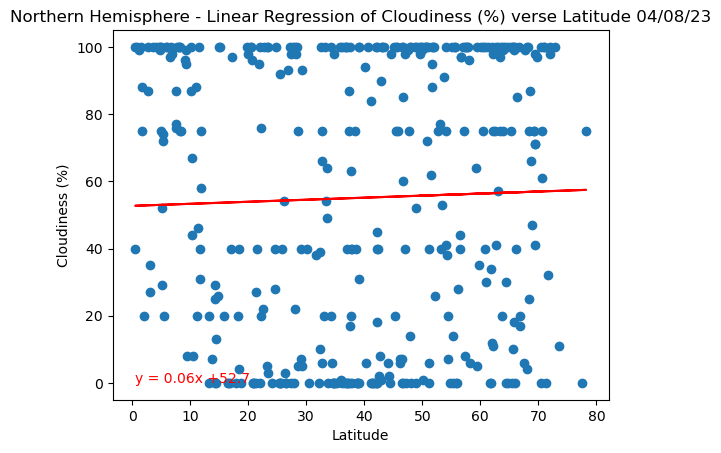

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (x_values.min(), y_values.min()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig5.png")

plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 378 and the array at index 1 has size 189

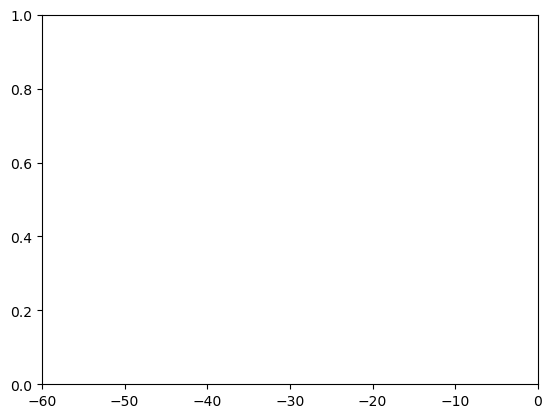

In [21]:
# Southern Hemisphere
x_vaules = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Southern", (x_values.min(), y_values.min()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig6.png")

plt.show()

Discussion about the linear relationship: For both the northern and southern hemisphers verse the cloudiness doesn't have a strong correlation with the regression line as the r-values are 0.02 and 0.09 respectively. 

### Wind Speed vs. Latitude Linear Regression Plot

 The rvalue is: 0.00491


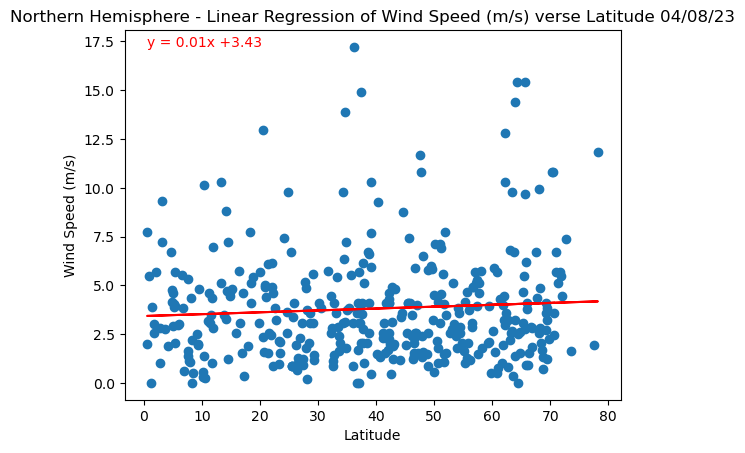

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Northern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig7.png")

plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 378 and the array at index 1 has size 189

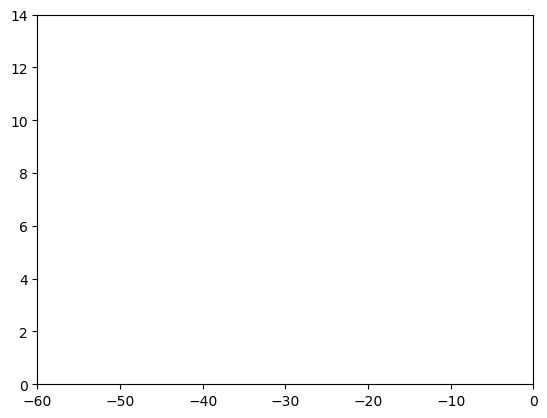

In [23]:
# Southern Hemisphere
x_vaules = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Southern", (x_vaules.min(), y_values.min()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig8.png")

plt.show()

Discussion about the linear relationship: The northern and southern hemispheres verse wind speed doesn't have a good correlation with the regression line with the r-value being 0.11 and 0.26 respectively.